In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)


In [26]:
df = dataset
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [27]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [28]:
df = dataset.dropna()

In [29]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [30]:
sns.pairplot(data = df, hue='Origin')

In [31]:
df_corr = df.corr()

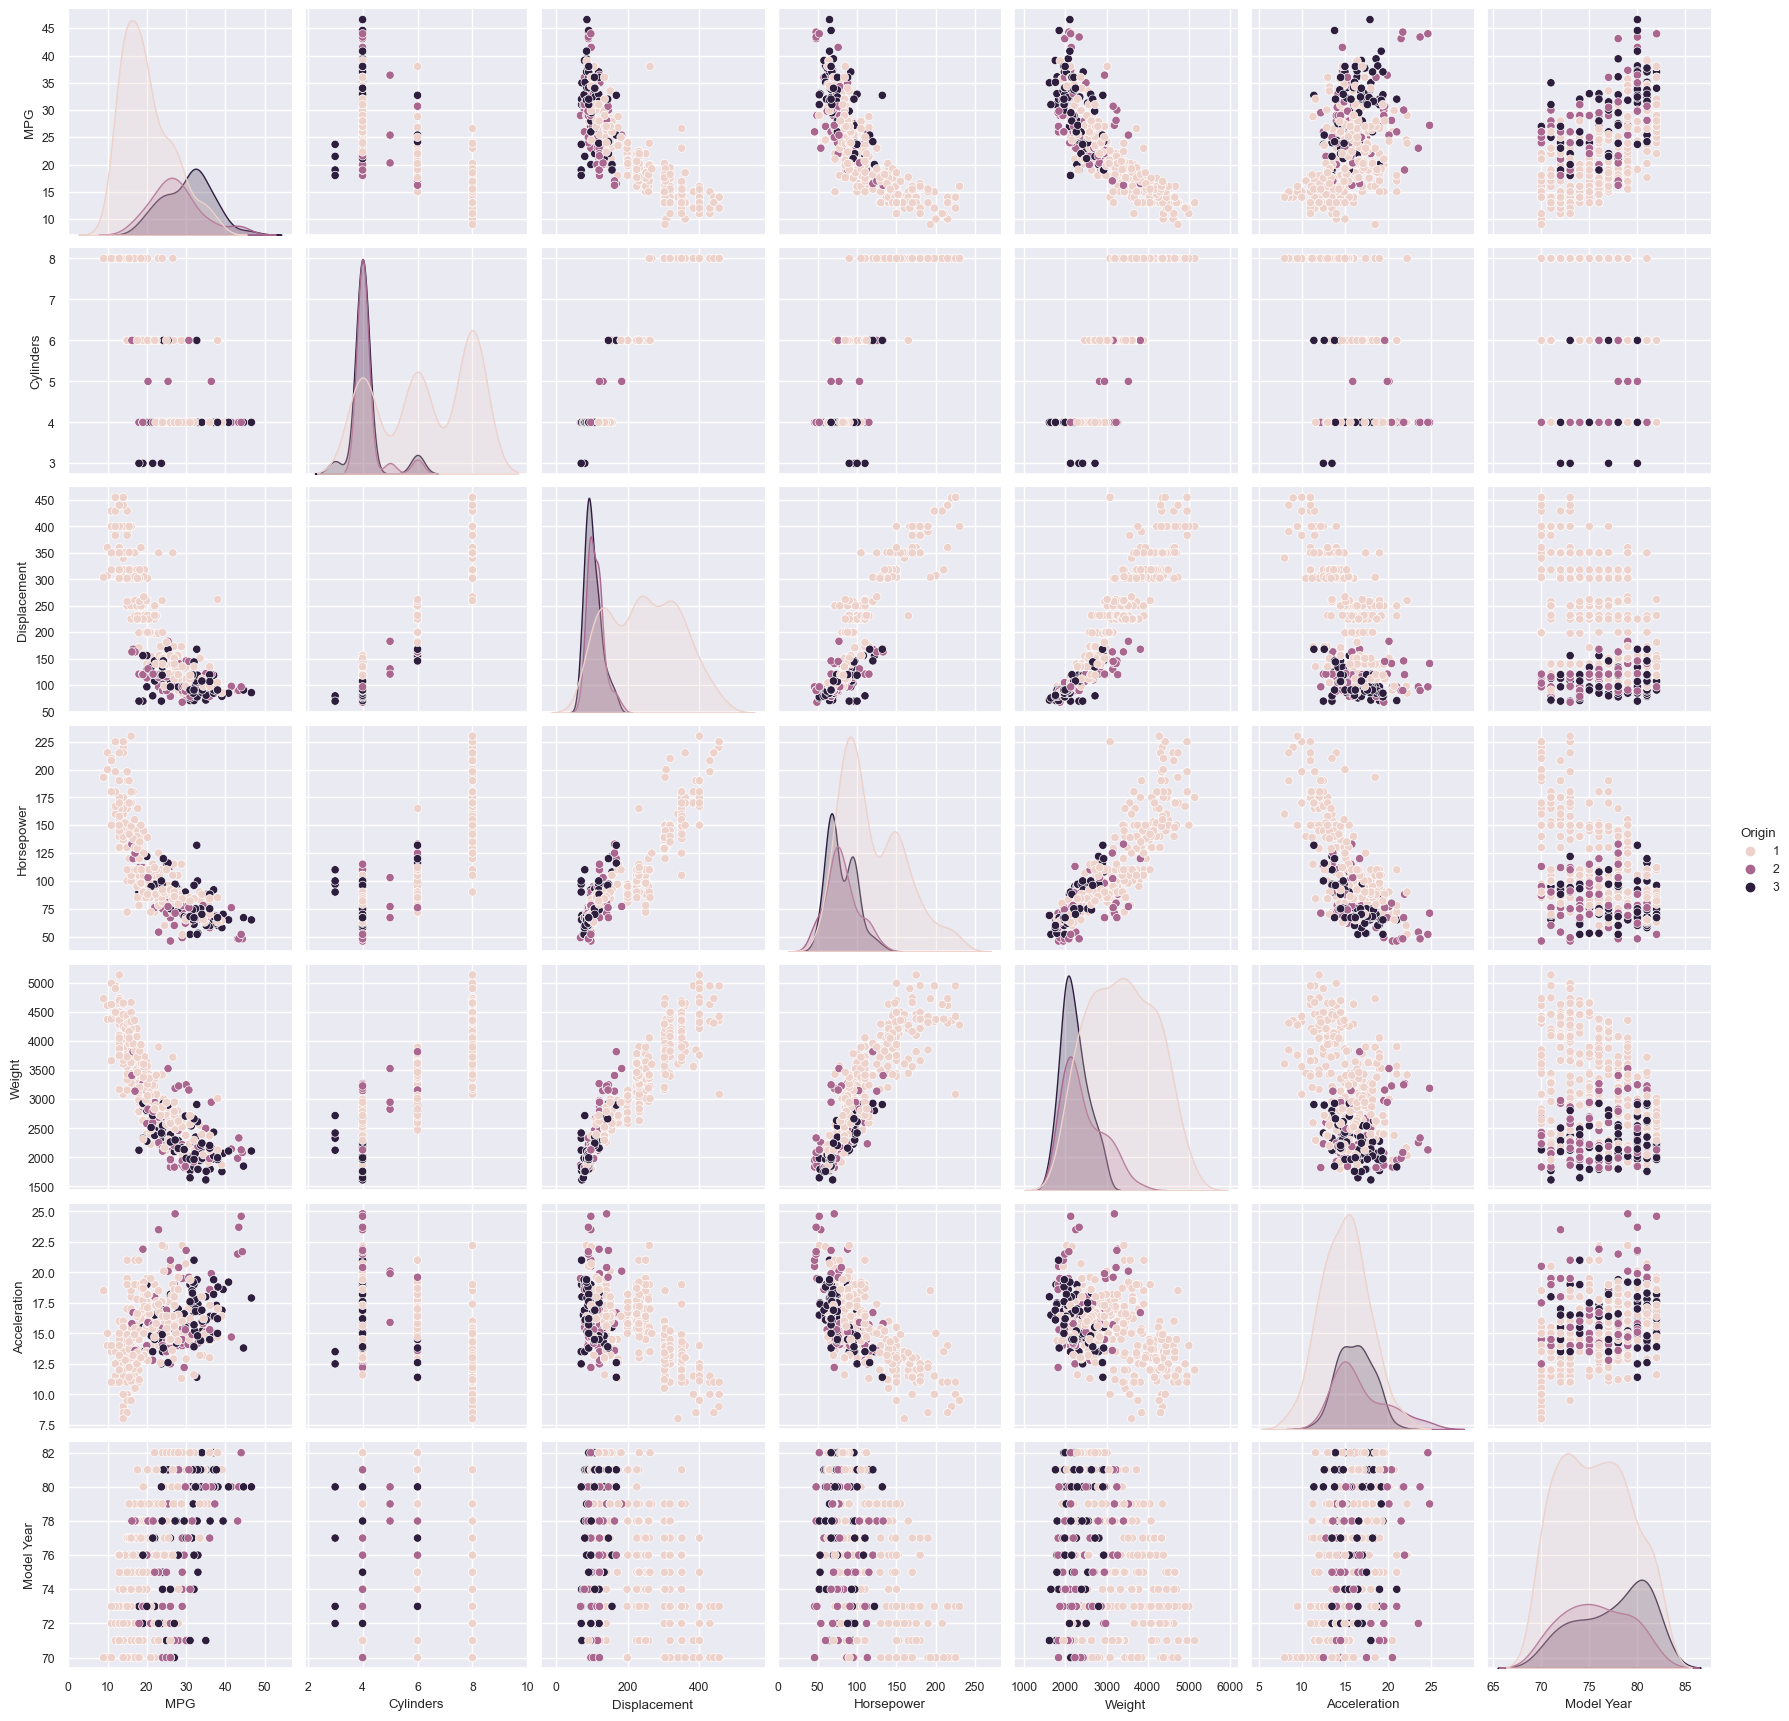

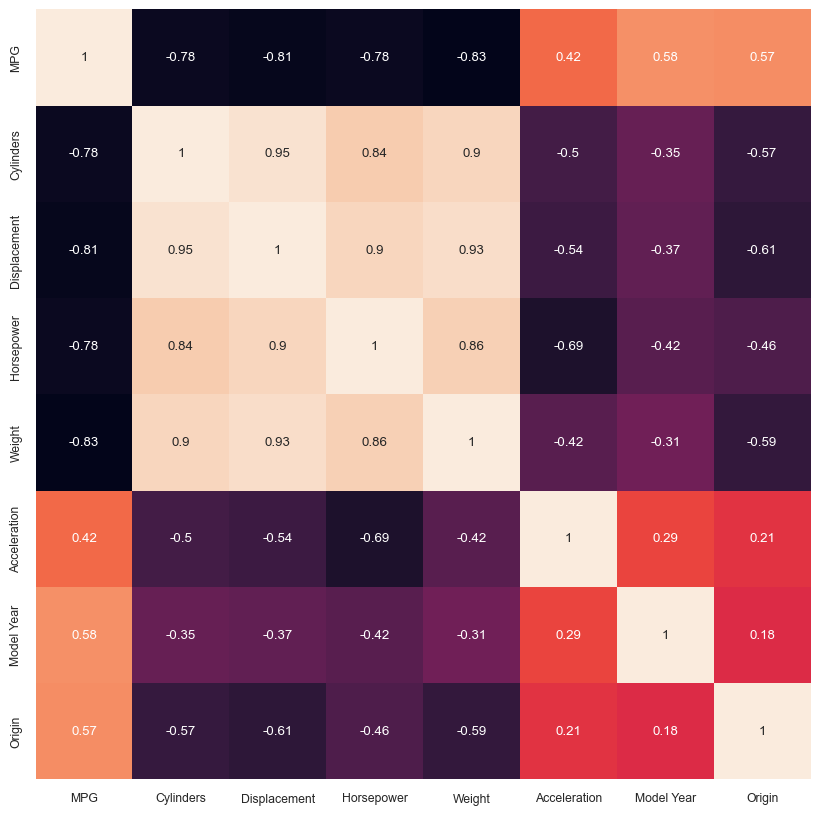

In [32]:
plt.figure(figsize = (10, 10))
sns.set(font_scale = 0.8)
sns.heatmap(df_corr, annot = True, cbar = False)
plt.show()

In [33]:
x = df.drop('Origin', axis=1)
y= df['Origin']

In [34]:
x.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Origin, dtype: int64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, shuffle=True, random_state=12)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(313, 7) (313,)
(79, 7) (79,)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [38]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.6962025316455697
[[43  0  0]
 [11  0  2]
 [11  0 12]]


In [39]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.810126582278481
[[41  1  1]
 [ 2  8  3]
 [ 4  4 15]]


In [40]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(x_train, y_train)

pred_nn = clf_nn.predict(x_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.7848101265822784
[[41  2  0]
 [ 2 11  0]
 [ 6  7 10]]


In [41]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7848101265822784
[[42  1  0]
 [ 0  8  5]
 [ 5  6 12]]


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, shuffle=True, random_state=12)

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [45]:
lr.fit(x_train, y_train)

LinearRegression()

In [46]:
lr.score(x_train, y_train)

0.4488296191702601

In [49]:
from sklearn.metrics import mean_squared_error

ly_preds = lr.predict(x_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.6243595115368497


In [51]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.5277130021690084


In [59]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.42386856095023767


In [58]:
from sklearn import svm

model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.4245474135230527
